# Interest Rates Analysis
This notebook analyzes different interest rates (Federal Funds Rate, 1-Year Treasury Rate, and 10-Year Treasury Rate) from 2015 to 2024.

## Setup
Import required libraries and set visualization styles.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Data Loading and Preprocessing
Load the cleaned data files and convert dates to datetime format.

In [3]:
# Load the cleaned data
federal_funds = pd.read_csv('cleaned_Federal_Funds_Rate.csv')
treasury_1y = pd.read_csv('cleaned_1_Year_Treasury_Rate.csv')
treasury_10y = pd.read_csv('cleaned_10_Year_Treasury_Rate.csv')

# Convert Original_Value to datetime
federal_funds['Original_Value'] = pd.to_datetime(federal_funds['Original_Value'])
treasury_1y['Original_Value'] = pd.to_datetime(treasury_1y['Original_Value'])
treasury_10y['Original_Value'] = pd.to_datetime(treasury_10y['Original_Value'])


## Time Series Visualization
Create a time series plot comparing all three interest rates over time.

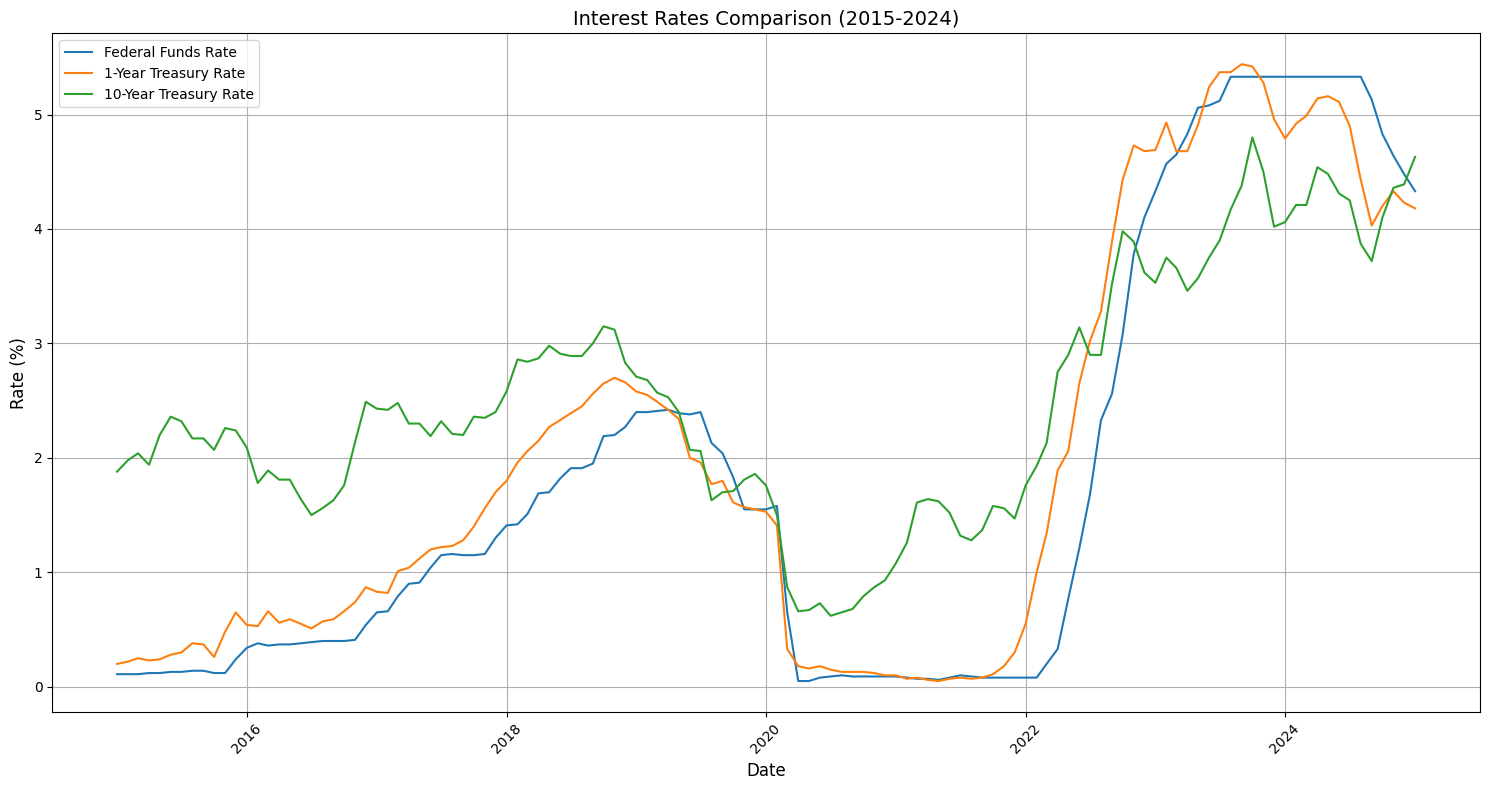

In [4]:
# Create a time series plot
plt.figure(figsize=(15, 8))

plt.plot(federal_funds['Original_Value'], federal_funds['Rate'], label='Federal Funds Rate')
plt.plot(treasury_1y['Original_Value'], treasury_1y['Rate'], label='1-Year Treasury Rate')
plt.plot(treasury_10y['Original_Value'], treasury_10y['Rate'], label='10-Year Treasury Rate')

plt.title('Interest Rates Comparison (2015-2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rate (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('interest_rates_comparison.png')
plt.show()


## Statistical Analysis
Calculate and display basic statistical measures for each interest rate.

In [5]:
# Calculate basic statistics
def print_statistics(data, rate_name):
    print(f'{rate_name} Statistics:')
    print(f'Mean Rate: {data["Rate"].mean():.2f}%')
    print(f'Median Rate: {data["Rate"].median():.2f}%')
    print(f'Standard Deviation: {data["Rate"].std():.2f}')
    print(f'Min Rate: {data["Rate"].min():.2f}%')
    print(f'Max Rate: {data["Rate"].max():.2f}%')

print_statistics(federal_funds, 'Federal Funds')
print_statistics(treasury_1y, '1-Year Treasury')
print_statistics(treasury_10y, '10-Year Treasury')


SyntaxError: EOL while scanning string literal (1107166303.py, line 3)

## Correlation Analysis
Visualize the correlations between different interest rates using a heatmap.

In [ ]:
# Calculate correlations between rates
correlations = pd.DataFrame({
    'Federal_Funds': federal_funds['Rate'],
    'Treasury_1Y': treasury_1y['Rate'],
    'Treasury_10Y': treasury_10y['Rate']
})

plt.figure(figsize=(10, 8))
sns.heatmap(correlations.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation between Different Interest Rates', fontsize=14)
plt.tight_layout()
plt.show()


## Year-over-Year Analysis
Calculate and visualize the year-over-year changes in interest rates.

In [ ]:
# Calculate year-over-year changes
def calculate_yoy_change(data):
    yearly_avg = data.groupby('Year')['Rate'].mean()
    return yearly_avg.pct_change() * 100

plt.figure(figsize=(15, 8))

plt.plot(calculate_yoy_change(federal_funds).index, calculate_yoy_change(federal_funds).values, 
         label='Federal Funds Rate', marker='o')
plt.plot(calculate_yoy_change(treasury_1y).index, calculate_yoy_change(treasury_1y).values, 
         label='1-Year Treasury Rate', marker='s')
plt.plot(calculate_yoy_change(treasury_10y).index, calculate_yoy_change(treasury_10y).values, 
         label='10-Year Treasury Rate', marker='^')

plt.title('Year-over-Year Change in Interest Rates', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage Change (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()
